# Solution by Nelson Niemeyer & Johannes Rieke

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

### 1. Visual stimulus

###### a.) approximate visual field (x,y) with 2D-grid of uniformly distributed photoreceptors

In [2]:
x0=y0=5 # size of visual field
deltax=deltay=0.1
vfx, vfy=np.meshgrid(np.linspace(-x0,x0,2*x0/deltax+1),np.linspace(-y0,y0,2*y0/deltay+1))

###### b.) compute sinusoidal grating

In [3]:
def s(x,y): #sinusoidal grating function
    return A*np.cos(K*x*np.cos(theta)+K*y*np.sin(theta)-phi)

In [4]:
theta=phi=0
A=1
K=np.pi

In [5]:
grating=s(vfx,vfy)

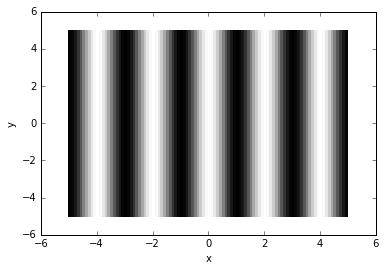

In [6]:
plt.pcolormesh(vfx,vfy,grating, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')

###### c.) vary orientation theta and spatial frequency K 

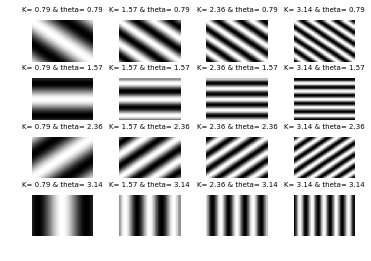

In [7]:
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,np.reshape(np.arange(1,17,1),(4,4))[i][j])
        theta=(i+1)/4*np.pi
        A=1.
        K=(j+1)/4*np.pi
        grating=s(vfx,vfy)
        plt.pcolormesh(vfx,vfy,grating, cmap='gray')
        titel='K= '+ str(round(K,2)) + ' & theta= '+ str(round(theta,2))
        plt.title(titel, fontsize=7)
        plt.axis('off')

## 2. A model of receptive fields

###### a.) implement Gabor function 

In [8]:
def D(x,y):
    z=1/(2*np.pi*sigmax*sigmay)*np.exp(-(x**2/(2*sigmax**2))-y**2/(2*sigmay**2))*np.cos(k*x-theta)
    return z

In [9]:
sigmax=2
sigmay=1
k=np.pi

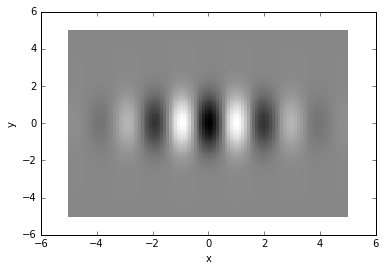

In [10]:
RF=D(vfx,vfy)
plt.pcolormesh(vfx,vfy,RF, cmap='gray') #why are positive values suddenly dark?
plt.xlabel('x')
plt.ylabel('y')

###### b.) what are the optimal stimuli for such an RF? Where can you find a neuron with such an RF? Does this RF characterize a simple cell or a complex cell and why?

A vertical bar of light with width of 1 degree of visual angle at the center of the visual field is a good stimulus for a neuron with such an RF. As this RF has several ON and OFF regions, an optimal stimulus would contain alternating black and white vertical bars with width of 1 degree of visual angle. This RF characterises a simple cell, because the response is position dependend. Such neurons can for example be found in cat primary visual cortex (V1), as classically defined by Hubel & Wiesel.

###### c.) calculate the response a cell with Gabor RF to sinusoidal grating, compare with response to uniformly illuminated visual field

In [11]:
def calcres(RF,stimulus):
    r=0
    for i in range(len(RF)):
        r+=np.dot(stimulus[i],RF[i])
    return r

In [12]:
theta=phi=0
A=1
K=np.pi
grating=s(vfx,vfy)
RF=D(vfx,vfy)

In [13]:
calcres(RF,grating)

49.437639941587065

In [14]:
uniform=A*np.ones_like(RF) #uniformly illuminated stimulus
calcres(RF,uniform)

0.11686983076511613

The response to a uniformly illuminated visual field is much smaller than the response to a sinusoidal grating. For the uniformly illuminated visual field, the activation caused by the light on the ON regions is cancelled out by the inhibition caused by the light on the OFF regions. However, for this sinusoidal grating (because the spatial phase and frequency of the grating match those of the RF) the activation from the light on the ON regions is not cancelled out by inhibition.

## 3. Tuning curves

In [15]:
def s(x,y,theta,phi,K): #sinusoidal grating function
    return A*np.cos(K*x*np.cos(theta)+K*y*np.sin(theta)-phi)

0.0

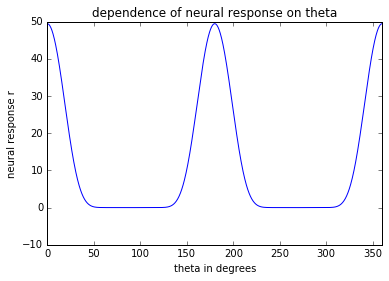

In [16]:
theta=phi=0
K=np.pi
sigmax=2
sigmay=1
k=np.pi


pd=[]
for theta in np.linspace(0,2*np.pi,1000):
    grating=s(vfx,vfy,theta,phi,K)
    res=calcres(RF,grating)
    pd.append([np.degrees(theta),res])

pd=np.array(pd)
plt.plot(pd[:,0],pd[:,1])
plt.xlim([0,360])
plt.xlabel('theta in degrees')
plt.ylabel('neural response r')
plt.title('dependence of neural response on theta')

pd[np.argmax(pd[:,1]),0]

1.0010010010010009

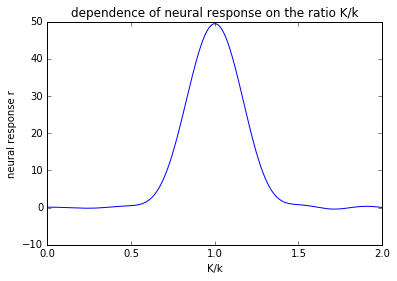

In [17]:
#set small k to 1, then 
theta=phi=0
K=np.pi
sigmax=2
sigmay=1
k=np.pi


pd=[]

for K in np.linspace(0,2*np.pi,1000):
    grating=s(vfx,vfy,theta,phi,K)
    res=calcres(RF,grating)
    pd.append([K/k,res])

pd=np.array(pd)
plt.plot(pd[:,0],pd[:,1])
plt.xlabel('K/k')
plt.ylabel('neural response r')
plt.title('dependence of neural response on the ratio K/k')

pd[np.argmax(pd[:,1]),0]

#note: also 'negative responses' between K/k ratio of 18-20, here excluded, because that doesn't seem to have a biological meaning. 

0.0

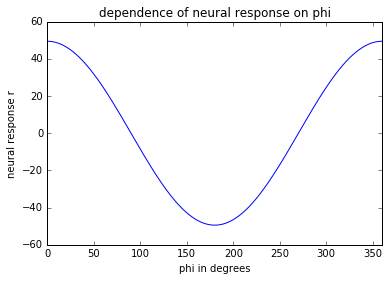

In [18]:
theta=phi=0
K=np.pi
sigmax=2
sigmay=1
k=np.pi

pd=[]
for phi in np.linspace(0,2*np.pi,1000):
    grating=s(vfx,vfy,theta,phi,K)
    res=calcres(RF,grating)
    pd.append([np.degrees(phi),res])

pd=np.array(pd)
plt.plot(pd[:,0],pd[:,1])
plt.xlim([0,360])
plt.xlabel('phi in degrees')
plt.ylabel('neural response r')
plt.title('dependence of neural response on phi')

pd[np.argmax(pd[:,1]),0]

This RF is selective for vertical stimulus orientation,  a spatial frequency that matches the spatial frequency of the cell's preferred value (a K/k ratio of 1) and a stimulus spatial phase of 0 degrees. 